# Machine Learning:
- __Deep Learning: Algorithms__
- ANN (Artificial Neuron Network) Algorithm.
- For Regression.

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

## 1. Load Dataset:

In [2]:
df = pd.read_csv("powerplant_data.csv")

In [3]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


## Notes for the dataset:
- AT => Temperature Value in Power Plant.
- VT => Vacuum Value in Power Plant.
- AP => Pressure Value in Power Plant.
- RH => Humidity Value in Power Plant.
- __PE => Produce Engrgy / Output.__

In [4]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

## Dividing dataset into X & Y values:

In [5]:
X = df.drop("PE", axis = 1) # Features
y = df["PE"] # Labels

In [6]:
X.head()# Features

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [7]:
y.head() # Labels

0    480.48
1    445.75
2    438.76
3    453.09
4    464.43
Name: PE, dtype: float64

## Split out data: train, test and split our data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42
)

In [9]:
X_train

,AT,V,AP,RH
5487,25.24,63.47,1011.30,66.21
3522,26.09,70.40,1007.41,85.37
6916,26.63,73.68,1015.15,85.13
7544,32.06,71.85,1007.90,56.44
7600,28.70,71.64,1007.11,69.85
...,...,...,...,...
5734,26.25,61.02,1011.47,71.22
5191,29.17,64.79,1016.43,61.05
5390,18.00,43.70,1015.40,61.28
860,26.73,68.84,1010.75,66.83


In [10]:
X_test

,AT,V,AP,RH
2513,29.70,57.35,1005.63,57.35
9411,25.71,71.64,1008.85,77.31
8745,17.83,44.92,1025.04,70.58
9085,9.46,41.40,1026.78,87.58
4950,29.90,64.79,1016.90,48.24
...,...,...,...,...
7204,20.46,51.43,1010.06,83.79
1599,29.70,67.17,1007.31,66.56
5697,14.64,39.58,1011.46,71.90
350,29.47,71.32,1008.07,67.00


In [11]:
y_train

5487    442.75
3522    432.52
6916    428.80
7544    426.07
7600    436.58
         ...  
5734    436.44
5191    441.20
5390    464.26
860     440.45
7270    484.44
Name: PE, Length: 7654, dtype: float64

In [12]:
y_test

2513    433.27
9411    438.16
8745    458.42
9085    480.82
4950    441.41
         ...  
7204    456.70
1599    438.04
5697    467.80
350     437.14
6210    456.78
Name: PE, Length: 1914, dtype: float64

In [13]:
df.shape

(9568, 5)

## Applying Standard Scaler:

In [14]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
X_train_scaled

array([[ 0.74805289,  0.72006931, -0.32660017, -0.49711722],
       [ 0.86181948,  1.26515721, -0.98521113,  0.8181501 ],
       [ 0.93409473,  1.52314975,  0.32523844,  0.80167494],
       ...,
       [-0.22097078, -0.834965  ,  0.36756563, -0.83554456],
       [ 0.94747903,  1.14245344, -0.41971997, -0.45455637],
       [-1.77355014, -1.19049131,  1.92520594,  0.91837402]])

In [16]:
X_test_scaled

array([[ 1.34499288,  0.23869298, -1.28658067, -1.10532538],
       [ 0.81095912,  1.36269098, -0.74140656,  0.26485915],
       [-0.2437241 , -0.73900436,  1.99970178, -0.19713193],
       ...,
       [-0.67068342, -1.15902881, -0.29951077, -0.10651852],
       [ 1.31420898,  1.33752097, -0.87346737, -0.44288647],
       [-0.2611237 , -0.27021304,  0.37433797,  1.10646548]])

## Converting data into Tensors:

In [17]:
X_train_tensor = torch.tensor(X_train_scaled, dtype = torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype = torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test_scaled, dtype = torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype = torch.float32).view(-1, 1)

In [18]:
type(X_train_scaled)

numpy.ndarray

In [19]:
type(y_train)

pandas.core.series.Series

In [20]:
y_train.shape

(7654,)

In [21]:
y_train

5487    442.75
3522    432.52
6916    428.80
7544    426.07
7600    436.58
         ...  
5734    436.44
5191    441.20
5390    464.26
860     440.45
7270    484.44
Name: PE, Length: 7654, dtype: float64

## 2. TensorDataset & DataLoader:

In [22]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

## Creating DataLoader from the TensorDataset:

In [23]:
train_loader = DataLoader(train_dataset, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size = 32)

## 3. Implementing an ANN Model: Deep Learning Algorithm
- ANN (Artificial Neuron Network) Algorithm.

In [24]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()

        self.model = nn.Sequential(
            # 1st hidden layer
            nn.Linear(X_train.shape[1], 6),
            nn.ReLU(),

            # 2nd hidden layer
            nn.Linear(6, 6),
            nn.ReLU(),

            # Output layer
            nn.Linear(6, 1)
        )

    # Forward Propagation
    def forward(self, x):   # <-- FIXED spelling
        return self.model(x)

## ANN Model: Object
- ANN (Artificial Neuron Network) Algorithm.

In [28]:
model = ANN()

# loss, optimiser
crietrion = nn.MSELoss()
optimiser = optim.Adam(model.parameters())

In [29]:
model

ANN(
  (model): Sequential(
    (0): Linear(in_features=4, out_features=6, bias=True)
    (1): ReLU()
    (2): Linear(in_features=6, out_features=6, bias=True)
    (3): ReLU()
    (4): Linear(in_features=6, out_features=1, bias=True)
  )
)

## 4. Traning our ANN Model:

In [30]:
# Train the ANN
train_losses = []
val_losses = []

best_val_loss = float("inf")

epochs = 100

for epoch in range(epochs):
    model.train()
    running_loss = 0.0 # tot training loss for 1 epoch
    
    for xb, yb in train_loader:
        # xb = features of 1 batch
        # yb = labels of 1 batch
        optimiser.zero_grad()
        
        outputs = model(xb) # forward prop....predicted outputs for this batch
        loss = crietian(outputs, yb) # compute loss
        loss.backward() # back prop.. compute gradients
        optimiser.step() # params update
        
        running_loss += loss.item() # loss is a tensor => py float

    epoch_train_loss = running_loss / len(train_loader)
    train_losses.append(epoch_train_loss)


    # Validation
    model.eval()
    running_val_loss = 0.0

    with torch.no_grad(): # no gradients compute
        for xb, yb in test_loader:
            outputs = model(xb)
            loss = crietrion(outputs, yb)
            running_val_loss += loss

    epoch_val_loss = running_val_loss / len(test_loader)
    val_losses.append(epoch_val_loss)

    print(f"epoch {epoch+1}/{epochs} ==> train loss = {epoch_train_loss} & val loss = {epoch_val_loss}")

    if epoch_val_loss < best_val_loss:
        best_val_loss = epoch_val_loss
        torch.save(model.state_dict(), "best_model.pt") #.pt or .pth

epoch 1/100 ==> train loss = 205578.76627604166 & val loss = 202363.75
epoch 2/100 ==> train loss = 192087.34518229167 & val loss = 176080.53125
epoch 3/100 ==> train loss = 150578.47978515626 & val loss = 121412.46875
epoch 4/100 ==> train loss = 91838.13645833333 & val loss = 65420.23046875
epoch 5/100 ==> train loss = 47421.406518554686 & val loss = 34485.0859375
epoch 6/100 ==> train loss = 26627.26612141927 & val loss = 21496.92578125
epoch 7/100 ==> train loss = 17766.971657307942 & val loss = 15375.2509765625
epoch 8/100 ==> train loss = 13227.806776936848 & val loss = 11588.111328125
epoch 9/100 ==> train loss = 10003.99277750651 & val loss = 8735.5029296875
epoch 10/100 ==> train loss = 7536.018240356445 & val loss = 6614.70947265625
epoch 11/100 ==> train loss = 5692.626686604818 & val loss = 5006.95361328125
epoch 12/100 ==> train loss = 4259.12711537679 & val loss = 3741.799560546875
epoch 13/100 ==> train loss = 3135.3388254801434 & val loss = 2738.05322265625
epoch 14/100

## Plotting the Model Loss for Traning & Validation is Decending:

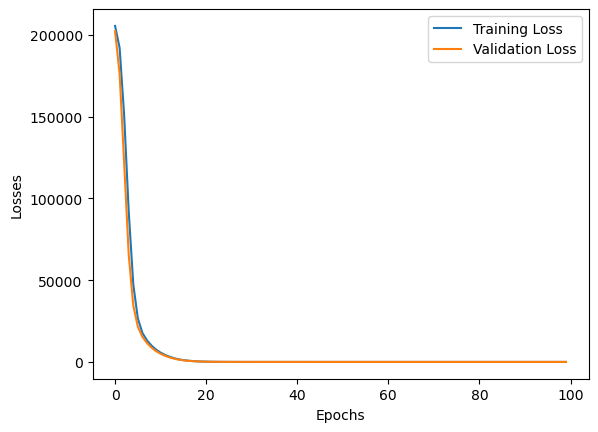

In [36]:
loss_df = pd.DataFrame({
    "Training Loss": train_losses,
    "Validation Loss": val_losses
})

plt.plot(loss_df["Training Loss"], label = "Training Loss")
plt.plot(loss_df["Validation Loss"], label = "Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Losses")

plt.legend()

## 5. Saving & Loading the Best Model:

In [37]:
model.load_state_dict(torch.load("best_model.pt"))

<All keys matched successfully>

## 6. Evaluation:

In [38]:
model.eval()
with torch.no_grad():
    train_preds = model(X_train_tensor)
    test_preds = model(X_test_tensor)

    train_mse_loss = crietrion(train_preds, y_train_tensor)
    test_mse_loss = crietrion(test_preds, y_test_tensor)

print("Training MSE:", train_mse_loss.item())
print("Testing MSE:", test_mse_loss.item())

Training MSE: 21.18444061279297
Testing MSE: 19.55169105529785


In [39]:
print("r^2 score =", r2_score(y_test, test_preds))

r^2 score = 0.9316718826462322


In [40]:
predicted_df = pd.DataFrame(test_preds.numpy(), columns=["Predicted Values"])
actual_df = pd.DataFrame(y_test.values, columns=["Actual Values"])

pd.concat([predicted_df, actual_df], axis=1)

,Predicted Values,Actual Values
0,435.570679,433.27
1,437.211304,438.16
2,461.359802,458.42
3,476.053467,480.82
4,435.926331,441.41
...,...,...
1909,451.246185,456.70
1910,431.981964,438.04
1911,467.452728,467.80
1912,431.477325,437.14
